<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/DataScienceJobSalaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 連接kaggle api
api_token = {"username":"victor830717","key":"e5ff0036288b15a13b2e2e4444e5051b"}
import json
import zipfile
import os

# 建資料夾 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
# !kaggle datasets download -d {kaggle資料集名稱} --force
!kaggle datasets download -d ruchi798/data-science-job-salaries --force
 
!ls /kaggle

  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 6.72MB/s]
data-science-job-salaries.zip


In [2]:
! unzip data-science-job-salaries.zip # 解壓縮檔案

Archive:  data-science-job-salaries.zip
  inflating: ds_salaries.csv         


In [130]:
import pandas as pd
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',10)
df = pd.read_csv('ds_salaries.csv')
df.head(6)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [131]:
datas = df.drop(['Unnamed: 0','salary','salary_currency'],axis=1)

y = datas['salary_in_usd']
x = datas.drop(['salary_in_usd'],axis=1)

x

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,US,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,US,100,US,M
603,2022,SE,FT,Data Engineer,US,100,US,M
604,2022,SE,FT,Data Analyst,US,0,US,M
605,2022,SE,FT,Data Analyst,US,100,US,M


In [132]:
def job(s):
    mid = s.split(" ")[-1]
    mid = mid.strip()
    return mid
x['job_title'] = x['job_title'].apply(job)
count = x['job_title'].value_counts()
print(count)
reserved = count[:4].index
def job2(s):
    if s in reserved:
        return s
    else:
        return "other"
x['job_title'] = x['job_title'].apply(job2)
x

Engineer       223
Scientist      194
Analyst        119
Manager         25
Architect       12
Science         11
Consultant       7
Data             5
Developer        5
Engineering      2
Researcher       1
Specialist       1
Learning         1
Lead             1
Name: job_title, dtype: int64


,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Scientist,DE,0,DE,L
1,2020,SE,FT,Scientist,JP,0,JP,S
2,2020,SE,FT,Engineer,GB,50,GB,M
3,2020,MI,FT,Analyst,HN,0,HN,S
4,2020,SE,FT,Engineer,US,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Engineer,US,100,US,M
603,2022,SE,FT,Engineer,US,100,US,M
604,2022,SE,FT,Analyst,US,0,US,M
605,2022,SE,FT,Analyst,US,100,US,M


In [133]:
count = x["company_location"].value_counts()
print(count)
reserved = count[:5].index
def company(s):
    if s in reserved:
        return s
    else:
        return "other"
x["company_location"]= x["company_location"].apply(company)
x

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64


,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Scientist,DE,0,DE,L
1,2020,SE,FT,Scientist,JP,0,other,S
2,2020,SE,FT,Engineer,GB,50,GB,M
3,2020,MI,FT,Analyst,HN,0,other,S
4,2020,SE,FT,Engineer,US,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Engineer,US,100,US,M
603,2022,SE,FT,Engineer,US,100,US,M
604,2022,SE,FT,Analyst,US,0,US,M
605,2022,SE,FT,Analyst,US,100,US,M


In [134]:
count = x["experience_level"].value_counts()
reserved = count[:4].index
print(reserved)
def experience(s):
    if s in reserved:
        return s
    else:
        return "other"
x["experience_level"] = x["experience_level"].apply(experience)
x

Index(['SE', 'MI', 'EN', 'EX'], dtype='object')


,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Scientist,DE,0,DE,L
1,2020,SE,FT,Scientist,JP,0,other,S
2,2020,SE,FT,Engineer,GB,50,GB,M
3,2020,MI,FT,Analyst,HN,0,other,S
4,2020,SE,FT,Engineer,US,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Engineer,US,100,US,M
603,2022,SE,FT,Engineer,US,100,US,M
604,2022,SE,FT,Analyst,US,0,US,M
605,2022,SE,FT,Analyst,US,100,US,M


In [135]:
count = x["employee_residence"].value_counts()
reserved = count[:5].index
print(reserved)
def residence(s):
    if s in reserved:
        return s
    else:
        return "other"
x["employee_residence"] = x["employee_residence"].apply(residence)
x

Index(['US', 'GB', 'IN', 'CA', 'DE'], dtype='object')


,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Scientist,DE,0,DE,L
1,2020,SE,FT,Scientist,other,0,other,S
2,2020,SE,FT,Engineer,GB,50,GB,M
3,2020,MI,FT,Analyst,other,0,other,S
4,2020,SE,FT,Engineer,US,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Engineer,US,100,US,M
603,2022,SE,FT,Engineer,US,100,US,M
604,2022,SE,FT,Analyst,US,0,US,M
605,2022,SE,FT,Analyst,US,100,US,M


In [136]:
x = pd.get_dummies(x)
# x = pd.get_dummies(x, columns=["work_year","remote_ratio"])
x

,work_year,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,...,employee_residence_other,company_location_CA,company_location_DE,company_location_GB,company_location_IN,company_location_US,company_location_other,company_size_L,company_size_M,company_size_S
0,2020,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,2020,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,2020,50,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,2020,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,2020,50,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,100,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
603,2022,100,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
604,2022,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
605,2022,100,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [137]:
# from sklearn.cluster import KMeans
# #親疏程度 silhouette score 介於0~1 , 1是最好
# from sklearn.metrics import silhouette_score
# for k in range(2, 20):
#     test = KMeans(n_clusters=k)
#     test.fit(x)
#     print("k:",k)
#     score = silhouette_score(x, test.labels_)
#     print("score:", score)
# #這裡的k代表分成幾群

In [138]:
# from sklearn.cluster import KMeans
# cluster = KMeans(n_clusters=3)
# cluster.fit(x)

In [139]:
# x["label"] = cluster.labels_
# x

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


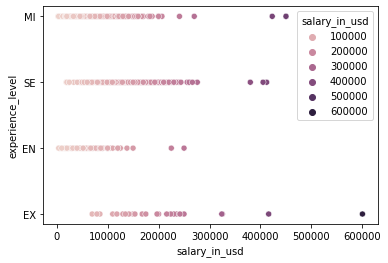

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
#seaborn繪製散點圖
sns.scatterplot(df["salary_in_usd"],
        df["experience_level"],
        hue=y)
#取pandas的dataform的每一行：df["名"]
#hue:加上更多資訊,加上顏色劃分

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train

389    124333
165    165000
424     80000
478    200000
192     18000
        ...  
126    120000
332    112900
78     270000
413     49461
137     77364
Name: salary_in_usd, Length: 485, dtype: int64

In [142]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# clf = RandomForestRegressor()
# params = {
#     "n_estimators":range(7, 101, 2),
#     "max_depth":range(5, 11)
# }
# #GridSearch函式：利用交叉驗證幫你調出最佳參數
# grid = GridSearchCV(clf, params, cv=10, n_jobs=-1, scoring="neg_log_loss")
# grid.fit(x_train, y_train)
# print(grid.best_score_)
# print(grid.best_params_)


In [143]:
# xgb_model = XGBRegressor(n_estimators=100, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# n_estimators：集成中樹的數量，通常會增加，直到看不到進一步的改進。
# max_depth：每棵樹的最大深度，通常值在 1 到 10 之間。
# eta：用於加權每個模型的學習率，通常設置為較小的值，例如 0.3、0.1、0.01 或更小。
# subsample：每棵樹中使用的樣本（行）數，設置為 0 到 1 之間的值，通常為 1.0 以使用所有樣本。
# colsample_bytree：每棵樹中使用的特徵（列）數，設置為 0 到 1 之間的值，通常為 1.0 以使用所有特徵。
# xgb_model.fit(x_train, y_train)

# predicted = xgb_model.predict(x_train)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
import xgboost
model = xgboost.XGBRegressor()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='r2', cv=10, n_jobs=-1) # 'neg_mean_absolute_error'
# force scores to be positive
scores = absolute(scores)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(scores.mean())
# print(predict)

[03:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.44640732814438877


In [144]:
import pandas as pd
#RandomForestClassifier的Attributes:feature_importances_找出特徵的重要性
pd.DataFrame(model.feature_importances_, 
       columns=["Importance"],
       index=x_train.columns).sort_values(by="Importance", ascending=False)
       #ascending=False降冪排列

,Importance
employee_residence_US,0.601763
job_title_Analyst,0.038434
experience_level_EX,0.036977
experience_level_EN,0.033491
experience_level_SE,0.025911
company_location_IN,0.025552
employee_residence_other,0.024210
company_location_US,0.019725
experience_level_MI,0.019053
job_title_other,0.018701


In [145]:
# 預測成功的比例
print('訓練集: ',model.score(x_train,y_train))
print('測試集: ',model.score(x_test,y_test))

訓練集:  0.6421467519206865
測試集:  0.45756733053040755


In [146]:
model.fit(x_train, y_train)
result = pd.DataFrame()

pre = model.predict(x_train)
result['actual'] = y_train
result['predict'] = [round(i) for i in pre]

result

[03:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,actual,predict
389,124333,75203
165,165000,200259
424,80000,155699
478,200000,143143
192,18000,41865
...,...,...
126,120000,151469
332,112900,118125
78,270000,242715
413,49461,63824


In [147]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.special import inv_boxcox1p
from sklearn.model_selection import cross_val_score
import numpy as np
cv = RidgeCV(cv=10)
cv.fit(x_train, y_train)
# print(cv.alpha_)
model =Ridge(alpha = cv.alpha_ )


scores = cross_val_score(model, np.array(x_train), np.array(y_train), cv=10, scoring="r2") 
# print(scores)
print(np.average(scores))
scores = cross_val_score(model, np.array(x_train), np.array(y_train), cv=10, scoring="neg_mean_absolute_error") 
# print(scores)
print(np.average(scores))

result = pd.DataFrame()
model.fit(x_train,y_train)
pre = model.predict(x_test)
pre = [int(i) for i in pre]
result['actual'] = y_test
result['predict'] = pre
result

0.48005491472876843
-32472.947029296636


,actual,predict
301,104702,101578
173,235000,171186
190,152000,140808
8,135000,117217
232,200000,187222
...,...,...
2,109024,97861
61,130800,74278
474,183228,78969
339,109280,128849


In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)
y_train_s = (y_train - min(y_train))/(max(y_train) - min(y_train))
x_train_s

array([[ 0.85344881, -1.72518758, -0.42432141, ..., -0.71148519,
         0.92641111, -0.37929925],
       [-0.58879047,  0.72493241, -0.42432141, ...,  1.40551063,
        -1.07943438, -0.37929925],
       [ 0.85344881, -1.72518758, -0.42432141, ..., -0.71148519,
         0.92641111, -0.37929925],
       ...,
       [-0.58879047,  0.72493241, -0.42432141, ...,  1.40551063,
        -1.07943438, -0.37929925],
       [ 0.85344881,  0.72493241, -0.42432141, ..., -0.71148519,
         0.92641111, -0.37929925],
       [-0.58879047, -0.50012759, -0.42432141, ..., -0.71148519,
        -1.07943438,  2.63644072]])

In [149]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
params = {"n_components":range(1, 50)}
pls = PLSRegression()
grid = GridSearchCV(pls, params, cv=10, n_jobs=-1, scoring="r2")
grid.fit(x_train_s,y_train_s)
print(grid.best_score_)
print(grid.best_params_)

# scores = cross_val_score(pls, x_train, y_train, cv=10, scoring="r2")
# print(scores)
# print(np.average(scores))

# scores = cross_val_score(pls, x_train, y_train, cv=10, scoring="neg_mean_absolute_error")
# print(scores)
# print(np.average(scores))


0.4809731711578076
{'n_components': 3}


In [150]:
pls = PLSRegression(n_components=3)
pls.fit(x_train_s,y_train_s)
pre = pls.predict(x_test_s)
pre = (pre * (max(y_test) - min(y_test))) + min(y_test)
pre = [int(i) for i in pre]
result = pd.DataFrame()
result['actual'] = y_test
result['predict'] = pre
result



,actual,predict
301,104702,143954
173,235000,231107
190,152000,172834
8,135000,155116
232,200000,249383
...,...,...
2,109024,134581
61,130800,116776
474,183228,113501
339,109280,170353


In [153]:
import keras 
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
classifier = Sequential()
callbacks = [
   EarlyStopping(patience=8, monitor = 'mae',restore_best_weights=True) 
]# monitor要根據model設定的loss or metrics設定

classifier.add(Dense(units = 16, kernel_initializer = 'uniform',input_dim =30, activation = 'relu'))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae']) 
classifier.fit(x_train_s, y_train_s, batch_size = 16, epochs = 200,callbacks=callbacks)

Epoch 1/200
31/31 [==============================] - 1s 2ms/step - loss: 0.0883 - mae: 0.2694
Epoch 2/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0830 - mae: 0.2598
Epoch 3/200
31/31 [==============================] - 0s 3ms/step - loss: 0.0722 - mae: 0.2398
Epoch 4/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0406 - mae: 0.1734
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0828
Epoch 6/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0116 - mae: 0.0722
Epoch 7/200
31/31 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.0719
Epoch 8/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0111 - mae: 0.0707
Epoch 9/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0702
Epoch 10/200
31/31 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0694
Epoch 11/200
31/31 [==============================] - 0s 2m

In [154]:
y_pred = classifier.predict(x_test_s)
y_pred = (y_pred * (max(y_test) - min(y_test))) + min(y_test)

predictions = [int(i) for i in y_pred]

Solution = pd.DataFrame()


# Prepare Solution dataframe
Solution['actual'] = y_test
Solution['predict'] = predictions

# Solution['predict'].unique()
Solution

4/4 [==============================] - 0s 4ms/step


,actual,predict
301,104702,156676
173,235000,250422
190,152000,200414
8,135000,167368
232,200000,256970
...,...,...
2,109024,143539
61,130800,121449
474,183228,106686
339,109280,156805
